Kimberly Adams

March 2024

# Book Recommender System

## Based on Ratings

### Purpose

Create a book recommender system using data from the “Book Recommendation Dataset” (https://www.kaggle.com/datasets/arashnic/book-recommendation-datasetUsing. The system will allow users to input a book they like (limited to the titles within the data set) and recommends other book for them to add to their reading list.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

### Data Import

In [2]:
# Import data from the Books.csv into a dataframe and then display dataframe
books = pd.read_csv (r'/Users/kimberlyadams/Documents/GitHub/Portfolio/Models/Book Recommender/Book Recommendation Dataset/Books.csv')
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
# Import data from the Ratings.csv into a dataframe and then display dataframe
ratings = pd.read_csv (r'/Users/kimberlyadams/Documents/GitHub/Portfolio/Models/Book Recommender/Book Recommendation Dataset/Ratings.csv')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Exploration and Cleanup

In [4]:
# Determine number of values in each column
books.count(axis=0)

ISBN                   271360
Book-Title             271360
Book-Author            271359
Year-Of-Publication    271360
Publisher              271358
Image-URL-S            271360
Image-URL-M            271360
Image-URL-L            271357
dtype: int64

In [5]:
# Determine number of unique values in each column
books.nunique(axis=0)

ISBN                   271360
Book-Title             242135
Book-Author            102023
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

Note that the counts of the ISBN and Book-Title are the same, but the unique values number is different.  This indicates that a book title might have multiple ISBN numbers.

In [6]:
# Count how many Title-Author combinations are unique
books.groupby(['Book-Title', 'Book-Author']).ngroups

251184

Looks like there are 251,184 unique books in the dataset based on Title and Author combinations.  I will add a column combining these columns so I can avoid duplicates later on.  I can't just assume that each title is unique since multiple authors can write books with the same title and unlikely as it is, some authors might even share names.

In [7]:
# Concatenate Title and Author text into a new column
books["TitleAuthor"] = books["Book-Title"] + " by " + books["Book-Author"]

In [8]:
# Merge the two dataframe based on the 'ISBN' column to get book and rating together
BookRatings= pd.merge(books, ratings, on= 'ISBN')
BookRatings.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,TitleAuthor,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Classical Mythology by Mark P. O. Morford,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,Clara Callan by Richard Bruce Wright,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,Clara Callan by Richard Bruce Wright,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,Clara Callan by Richard Bruce Wright,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,Clara Callan by Richard Bruce Wright,41385,0


My computer also started having issues with the larger dataset, so I also trimmed out users that had not rated at least 9 books so as to only view the "active" users. Normally I would NOT have done this step, but the computer crashed non-stop until I did.

In [9]:
# Creating a dictionary using value_counts()
items = BookRatings['User-ID'].value_counts().to_dict().items()

# Filtering only those rows where duplicate entries occur more than n
n = 9
BookRatingsActiveUsers = BookRatings[BookRatings['User-ID'].isin([key for key, val in items if val > n])]

Many books have a rating of 0.  Since most rating system will only let you rate as low as 1 star, I am going to assume that 0 means the user did not rate the book and thereby I am going to replace the 0s with null values.

In [10]:
# Replace 0 book rating scores with null.
BookRatings['Book-Rating'].replace(0, np.nan, inplace=True)

In [11]:
# Create new dataframe with active user ratings that are greater than 0
BookRatings = BookRatingsActiveUsers[BookRatingsActiveUsers['Book-Rating'] > 0]
BookRatings.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,TitleAuthor,User-ID,Book-Rating
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,Clara Callan by Richard Bruce Wright,8,5
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,Clara Callan by Richard Bruce Wright,11676,8
5,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,Clara Callan by Richard Bruce Wright,67544,8
8,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,Clara Callan by Richard Bruce Wright,116866,9
13,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,Clara Callan by Richard Bruce Wright,219008,7


Looks like there are multiple listings now for each book so we might need to average the ratings to get an overall score and then remove the duplicates.

In [12]:
# Group the rows by the book's ISBN to get all the reviews for each book together and remove duplicates
# Get the average rating for the book from all the user ratings
# Sort the resulting dataframe by rating
Summary = BookRatings.groupby('TitleAuthor').agg({'Book-Rating':'mean'}).sort_values(by='Book-Rating', ascending=False)

In [13]:
# Group the combined dataframe rows by the book's title/author combination and count how many ratings each book recieved
# Put count values into new column
Summary['RatingsNum'] = pd.DataFrame(BookRatings.groupby('TitleAuthor')['Book-Rating'].count())

Text(0, 0.5, 'Count')

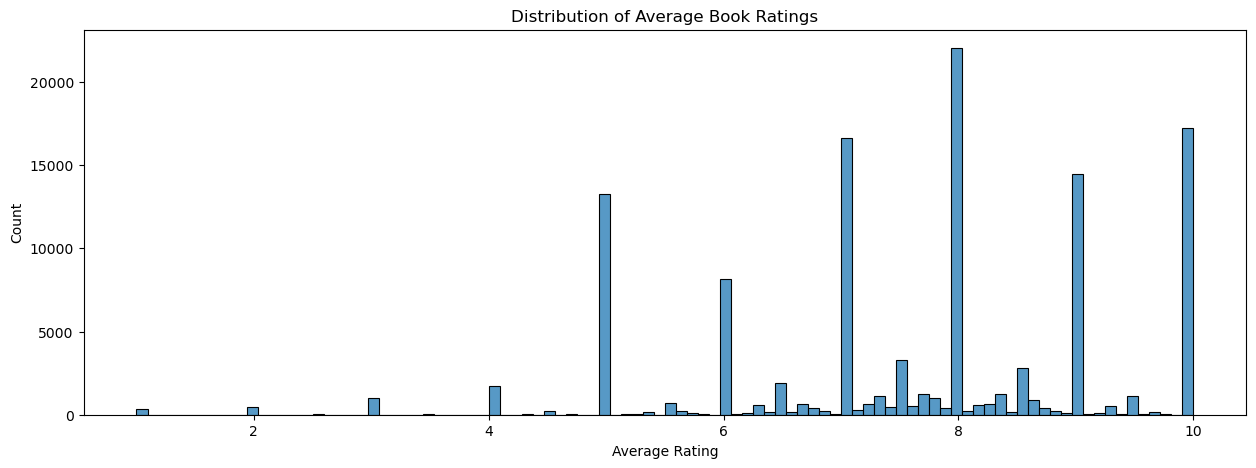

In [14]:
# Plot distribution of the ratings to see the shape of the data
plt.figure(figsize=(15,5))
sns.histplot(Summary['Book-Rating'])
plt.title("Distribution of Average Book Ratings")
plt.xlabel('Average Rating')
plt.ylabel('Count')

From this distribution we can see that most of the ratings are 5-10 so overall users are rating books they liked. There are a few lower ratings so occasionally users indicated they did not like a book, but these are rare. 

In addition to the overall skew towards higher values, there is still a large number of 5 ratings that would potentially keep this from an otherwise normal distribution (when only looking at the higher values).

Text(0, 0.5, 'Count')

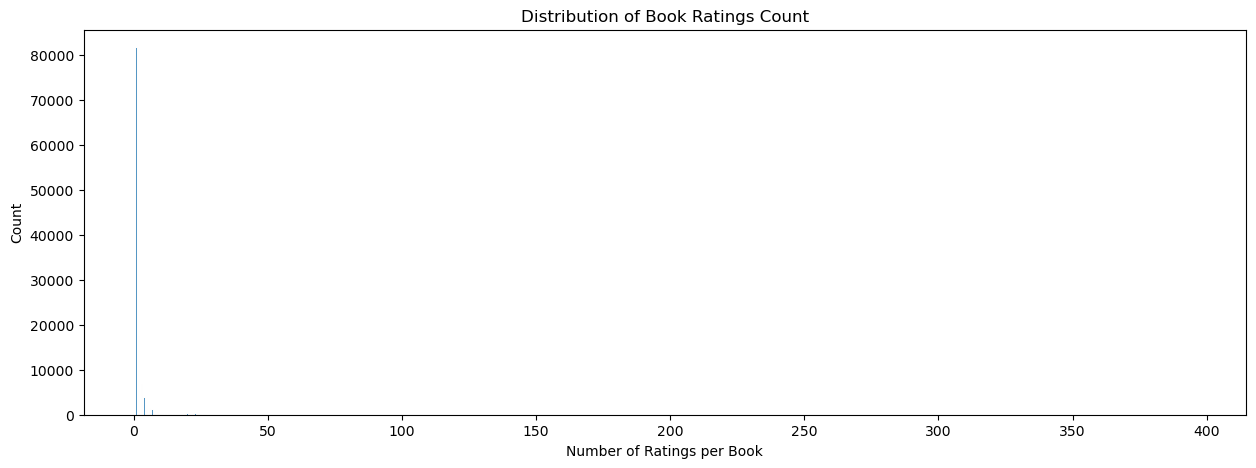

In [15]:
# Plot distribution of the number of ratings per book to see the shape of the data
plt.figure(figsize=(15,5))
sns.histplot(Summary['RatingsNum'])
plt.title("Distribution of Book Ratings Count")
plt.xlabel('Number of Ratings per Book')
plt.ylabel('Count')

That's a little hard to see anything.  Let's look at the data itself.

In [16]:
# Allow all rows of dataframe to show
pd.set_option('display.max_rows', None)

# Display the number of books with each number of ratings
Summary.RatingsNum.value_counts().sort_index()

1      81590
2      17492
3       6935
4       3671
5       2226
6       1513
7       1092
8        805
9        566
10       487
11       356
12       297
13       287
14       269
15       219
16       158
17       157
18       122
19       119
20       105
21       110
22        77
23        80
24        60
25        58
26        57
27        53
28        47
29        42
30        48
31        37
32        31
33        29
34        26
35        22
36        21
37        27
38        17
39        14
40        20
41        23
42        16
43        16
44        21
45        15
46        14
47        19
48        18
49        12
50         9
51         9
52        18
53        13
54        14
55         7
56         9
57        12
58         8
59        10
60         7
61         8
62         5
63         4
64         5
65         7
66         6
67         5
68         3
69         6
70         5
71         4
72         6
73         5
74         4
75         6
76         2
77         6

In [17]:
# What is the highest number of ratings on a single book?
print(max(Summary['RatingsNum']))

395


In [18]:
# What is the average number of ratings?
print(Summary[['RatingsNum']].mean(axis=0))

RatingsNum    2.412841
dtype: float64


From this plot and table we can see that most books are not rated and after that most have only 1 or 2 ratings. The book with the highest number of ratings has only 707. On average books have only 2.75 ratings so that isn't very high.  

The recommender will need to take into account movies that just have a single rating may not be accurately portrayed by that rating as that is a single person's opinion. However, since there is not much data available on each book, any rating is better than none.

### Recommendation

In [19]:
# Create a pivot table with each user's ratings for all books within the database.
recommend = BookRatings.pivot_table(index='User-ID', columns='TitleAuthor',values='Book-Rating')
recommend.head()

TitleAuthor,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America) by Karen Hesse","Ask Lily (Young Women of Faith: Lily Series, Book 5) by Nancy N. Rue",Dark Justice by Jack Higgins,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth by Elizabeth Roberts",Final Fantasy Anthology: Official Strategy Guide (Brady Games) by David Cassady,Flight of Fancy: American Heiresses (Zebra Ballad Romance) by Tracy Cozzens,Garfield Bigger and Better (Garfield (Numbered Paperback)) by Jim Davis,God's Little Promise Book by Word Pub,"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750 by Laurel Thatcher Ulrich","Goosebumps Monster Edition 1: Welcome to Dead House, Stay Out of the Basement, and Say Cheese and Die! by R. L. Stine",...,Ã?Â?ber das Fernsehen. by Pierre Bourdieu,Ã?Â?ber den ProzeÃ?Â? der Zivilisation 1. by Norbert Elias,Ã?Â?ber den ProzeÃ?Â? der Zivilisation 2. by Norbert Elias,Ã?Â?ber die Freiheit. by John Stuart Mill,Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat. by Henry David Thoreau,Ã?Â?berallnie. AusgewÃ?Â¤hlte Gedichte 1928 - 1965. by Marie Luise Kaschnitz,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Country Inns und Bed und Breakfast der USA. by Christopher Fennel,Ã?Â?rger mit Produkt X. Roman. by Joan Aiken,Ã?Â?stlich der Berge. by David Guterson,Ã?Â?thique en toc by Didier Daeninckx
User-ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This table is mostly NaNs because not every user has seen every movie or at very least submitted a rating for it.

In [20]:
# Type in book and author combination from database to search for. 
# Note: If this were a stanealone app, the user would ideally have a dropdown to pick from.
search = 'The Da Vinci Code by Dan Brown'

# Lookup rating for the searched book
Rating_Lookup = recommend[search]

# Find similar book ratings from the `recommend` pivot_table based on the rating of the searched book
# Create a dataframe with results as a Correlation column
correlation = pd.DataFrame(recommend.corrwith(Rating_Lookup), columns=['Correlation'])

# Drop the empty values 
correlation.dropna(inplace=True)

# Add the number of users who rated that book to the dataframe
correlation = correlation.join(Summary['RatingsNum'])

# Get recommendations by looking for high correlation values between book ratings
# Only consider books that over 25 users have read to weed out less popular books
# Print out top 10 recommendations
correlation[correlation['RatingsNum']>25].sort_values(by='Correlation',ascending=False).head(10)

,Correlation,RatingsNum
TitleAuthor,,
Let Me Call You Sweetheart by Mary Higgins Clark,1.0,28
On the Road (Penguin 20th Century Classics) by Jack Kerouac,1.0,26
"The Lion, the Witch, and the Wardrobe (The Chronicles of Narnia, Book 2) by C. S. Lewis",1.0,37
Foucault's Pendulum by Umberto Eco,1.0,30
The Da Vinci Code by Dan Brown,1.0,314
The Mulberry Tree by Jude Deveraux,1.0,41
Open House (Oprah's Book Club (Paperback)) by Elizabeth Berg,1.0,34
Shell Seekers by Rosamunde Pilcher,1.0,26
Speak by Laurie Halse Anderson,1.0,26


In [21]:
# Running again with a different book to compare results

# Type in book and author combination from database to search for. 
# Note: If this were a stanealone app, the user would ideally have a dropdown to pick from.
search = 'A Christmas Carol by Charles Dickens'

# Lookup rating for the searched book
Rating_Lookup = recommend[search]

# Find similar book ratings from the `recommend` pivot_table based on the rating of the searched book
# Create a dataframe with results as a Correlation column
correlation = pd.DataFrame(recommend.corrwith(Rating_Lookup), columns=['Correlation'])

# Drop the empty values 
correlation.dropna(inplace=True)

# Add the number of users who rated that book to the dataframe
correlation = correlation.join(Summary['RatingsNum'])

# Get recommendations by looking for high correlation values between book ratings
# Only consider books that over 25 users have read to weed out less popular books
# Print out top 10 recommendations
correlation[correlation['RatingsNum']>25].sort_values(by='Correlation',ascending=False).head(10)

,Correlation,RatingsNum
TitleAuthor,,
Fried Green Tomatoes at the Whistle Stop Cafe by Fannie Flagg,-1.0,97


Overall, this recommendation system only seems to be recommending similarly rated books without taking anything else into account.  This makes sense as this is the only data we fed the model. However, this approach returns a lot of titles that would likely not interest the user due to other characteristics of the book such as distasteful genres. Or in the case of A Christmas Carol, barely returned any suggestions at all.

I feel like there is a better way to take more details about the book into account.

## Based on Content

### Purpose

Create a book recommender system using data from the “Goodreads' Best Books Ever” dataset found on Kaggle (https://www.kaggle.com/datasets/meetnaren/goodreads-best-books). 

The system will allow users to input a book they like (limited to the titles within the data set) and recommends other books for them to add to their reading list.  Recommendations are based on the similarity of the books' descriptions and thus is more tailored to individual tastes than a flat rating system.  By factoring in the actual content of the book, we can avoid recommending something in a completely different genre that just happened to be highly rated.

### Data Import

In [22]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import linear_kernel

In [23]:
# Import data from the book_data.csv into a dataframe and then display dataframe
books = pd.read_csv (r'/Users/kimberlyadams/Documents/GitHub/Portfolio/Models/Book Recommender/GoodreadsBestBooks/book_data.csv')
books.head()

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...


### Data Exploration

In [24]:
# Determine number of unique values in each column
books.nunique(axis=0)

book_authors         27159
book_desc            51781
book_edition          2134
book_format            147
book_isbn              548
book_pages            1403
book_rating            259
book_rating_count    21860
book_review_count     6895
book_title           48483
genres               30094
image_url            53618
dtype: int64

Text(0, 0.5, 'Count')

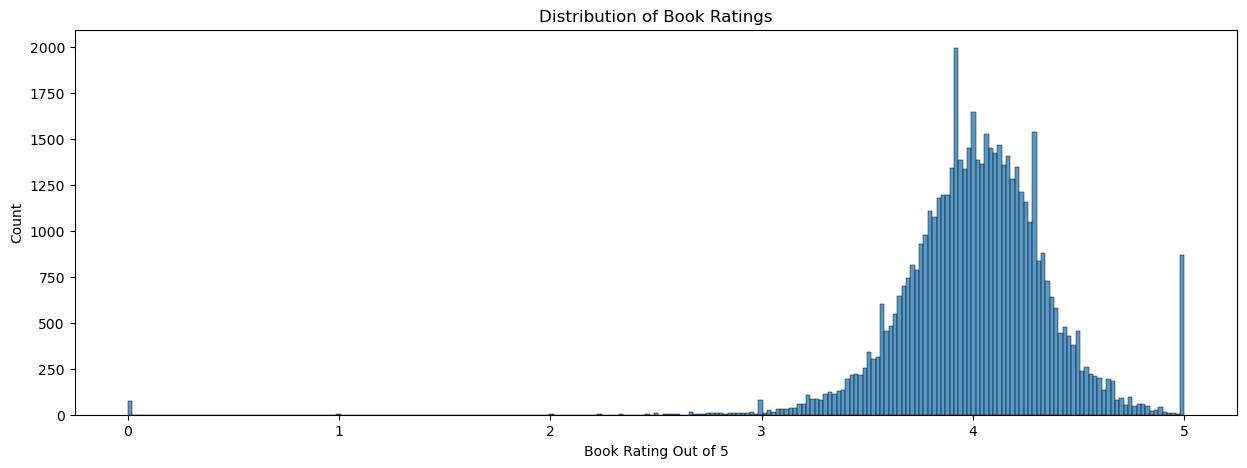

In [25]:
# Plot distribution of the number of ratings per book to see the shape of the data
plt.figure(figsize=(15,5))
sns.histplot(books['book_rating'])
plt.title("Distribution of Book Ratings")
plt.xlabel('Book Rating Out of 5')
plt.ylabel('Count')

The graph shows a nicely normal distribution centered around 4 but it quickly tapers off to 3 and 5, effectively cutting off anything below a 3 rating.  This shows that the users who rate books enjoyed them and that users are unlikely to put the effort into rating a book they did not enjoy.There is also a fun little spike at 5 which shows people love to rate their favorite books.

Text(0, 0.5, 'Count')

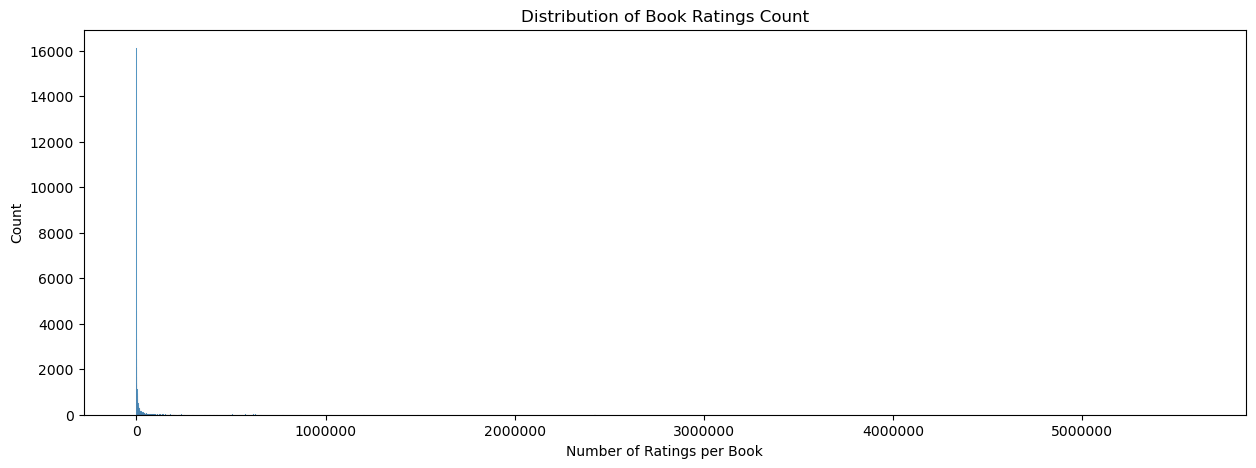

In [26]:
# Plot distribution of the number of ratings per book to see the shape of the data
plt.figure(figsize=(15,5))
sns.histplot(books['book_rating_count'])
plt.title("Distribution of Book Ratings Count")
plt.xlabel('Number of Ratings per Book')
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('Count')

When looking at the number of ratings each book had, a graph just was no showing much so a table is a better visual here.  There are some books (like The Hunger Games) that were rated by over 550,000 users, while 75 books in the database have no ratings and 357 only have 1 rating.  Such a difference made the scale of the graph so large, the data was invisible on it.  

Overall there is fairly good showing of ratings for the books in the database.  Based on the count earlier though, only 259 books in the database have a rating, so probably not going to be useful for this recommendation system as the data is too sparse to take into meaningful account.

In [27]:
# Allow all rows of dataframe to show
pd.set_option('display.max_rows', None)

# Display the number of ratings and the number of books with that rating
books.book_rating_count.value_counts().sort_index()

0           75
1          357
2          373
3          353
4          278
5          218
6          209
7          180
8          187
9          179
10         157
11         165
12         162
13         143
14         156
15         135
16         110
17         106
18         101
19         100
20         113
21         110
22          80
23          73
24          75
25          81
26          99
27          87
28          83
29          76
30          82
31          59
32          68
33          87
34          73
35          71
36          63
37          63
38          72
39          57
40          64
41          69
42          51
43          61
44          49
45          68
46          57
47          42
48          62
49          64
50          60
51          40
52          47
53          49
54          46
55          47
56          44
57          52
58          52
59          45
60          57
61          33
62          50
63          38
64          46
65          51
66        

### Data Cleaning and Processing

In [28]:
# Trim dataframe to needed columns for book title, description, and number of ratings
books = books[["book_title", "book_authors", "book_desc", "genres", "book_rating_count"]]

In [29]:
# Count null values in each column.
books.isna().sum()

book_title              0
book_authors            0
book_desc            1331
genres               3242
book_rating_count       0
dtype: int64

In [30]:
# Drop rows with missing data
books = books.dropna()

In [31]:
# Group same named books together to avoid duplicated results
# Grab the description and rating count from first encountered line
books = books.groupby("book_title", as_index=False).agg({"book_title":"first", "book_authors":"first", "book_desc":"first", "genres":"first", "book_rating_count":"sum"})

In [32]:
# Re-determine number of unique values in each column after trimming
books.nunique(axis=0)

book_title           44526
book_authors         23552
book_desc            44129
genres               28423
book_rating_count    19316
dtype: int64

In [33]:
# Add quotes to beginning and end of book description
books["book_desc"] = books["book_desc"].apply(lambda x: "'" + str(x) + "'")

### Set Up Model and Access Function

In [34]:
# Define characteristic feature and vectorizing model
feature = books["book_desc"].tolist()
tfidf = text.TfidfVectorizer(stop_words="english")

In [35]:
# Form matrix from model and calculate simularity
tfidf_matrix = tfidf.fit_transform(feature)
similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

In [36]:
# Set book title as search parameter
indices = pd.Series(books.index,
                    index=books['book_title']).drop_duplicates()

In [37]:
# Define a function to return up to 20 recommended titles
# Sort based on similarity to entered title
def book_recommendations(title, similarity = similarity):
    index = indices[title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[0:20]
    bookindices = [i[0] for i in similarity_scores]
    recommendations = pd.DataFrame(books[['book_title','book_authors','genres']].iloc[bookindices])
    return recommendations

### Perform Query and Return Results

In [38]:
# Enter book to search for recommendations within quotes
# Results will be displayed in a dataframe with corresponding genres
book_recommendations("The Da Vinci Code")

,book_title,book_authors,genres
30961,The Da Vinci Code,Dan Brown,Fiction|Mystery|Thriller
2783,Angels and Demons / The Da Vinci Code,Dan Brown,Fiction|Mystery|Thriller|Historical|Historical...
34365,The Lost Symbol,Dan Brown,Fiction|Mystery|Thriller
22419,Oprindelse,Dan Brown,Fiction|Thriller|Mystery|Thriller|Mystery Thri...
2774,Angels & Demons,Dan Brown,Fiction|Mystery|Thriller
2775,Angels & Demons - Malaikat dan Iblis,Dan Brown|Isma B. Koesalamwardi,Fiction|Mystery|Thriller
21792,O Código Da Vinci,Dan Brown|Celina Cavalcante Falck-Cook,Fiction|Mystery|Thriller
31282,The Devil's Chord,Alex Archer|Michele Hauf,Fantasy|Fiction|Fantasy|Urban Fantasy|Action|A...
37127,The Smile,Donna Jo Napoli,Historical|Historical Fiction|Young Adult|Hist...
10645,Evil in the Beginning,Gary Williams|Vicky Knerly,Mystery|Thriller|Adventure|Fiction


In [39]:
# Running again with a different book to verify different results are given.
book_recommendations("A Christmas Carol")

,book_title,book_authors,genres
416,A Christmas Carol,Charles Dickens|Joe L. Wheeler,Classics|Fiction|Holiday|Christmas|Fantasy|Lit...
417,A Christmas Carol and Other Christmas Writings,Charles Dickens|Michael Slater,Classics|Fiction|Holiday|Christmas|Short Stori...
418,"A Christmas Carol, The Chimes and The Cricket ...",Charles Dickens|Katharine Kroeber Wiley,Classics|Fiction|Holiday|Christmas|Literature
95,12 Stocking Stuffers,Beverly Barton|Helen Bianchin|Janelle Denison|...,Romance|Contemporary|Holiday|Christmas|Antholo...
30393,The Christmas Box,Richard Paul Evans,Holiday|Christmas|Fiction|Holiday|Inspirational
11309,Finding Noel,Richard Paul Evans,Holiday|Christmas|Fiction|Romance|Holiday
400,A Charlie Brown Christmas,Charles M. Schulz,Holiday|Christmas|Childrens|Childrens|Picture ...
4101,Belstarr The Lost Toymaker,David Jacks|Daniel S. Morrow,Holiday|Christmas|Childrens|Picture Books
30391,The Christmas Basket,Debbie Macomber,Holiday|Christmas|Romance|Holiday|Fiction|Wome...
6321,Christine Kringle,Lynn Brittney,Holiday|Christmas


The results of this model are much nicer than the previous approach, but it too has some drawbacks.  The recommendations often include the title submitted and variations there of.  This makes sense as there is nothing preventing it from doing so and the variations would be similar to the original from the descriptions.

### References

Aman Kharwal. July 19, 2022. *Book Recommendation System using Python.* https://thecleverprogrammer.com/2022/07/19/book-recommendation-system-using-python/

Book Recommendation Dataset. (2024, February 9). https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset

Jayashree Domala. April 8, 2021. *Movie Similarity Recommendations Using Python.* https://betterprogramming.pub/movie-similarity-recommendation-using-python-b98a2670a2ad

Naren. *Goodreads Best Books Ever.* Kaggle. https://www.kaggle.com/datasets/meetnaren/goodreads-best-books

Sisodia, R. (2021a, December 11). Movie recommendation system. Medium. https://medium.com/@rahulsisodia06/movie-recommendation-system-c8113226c0aa 